# EDA

In [1]:
!pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [3]:
train = pd.read_csv("data/train.csv")

In [4]:
train = train.drop(['id'],axis=1)

In [5]:
train

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...
1454,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


1. 상관계수 (count : 수치형 )

- 상관계수 : 변수들간에 서로 선형적 관계가 있는지.
- 0.3 이상만 되도 충분히 상관이 있다.
- 단, 비선형적일 경우는 수치로 판단이 안된다.


In [6]:
train.corr()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
hour,1.000000,0.407306,0.021646,0.462797,-0.329612,0.176491,0.390188,-0.035907,-0.061229,0.626047
hour_bef_temperature,0.407306,1.000000,-0.097056,0.375618,-0.496088,0.197417,0.541228,-0.003830,-0.078665,0.619404
hour_bef_precipitation,0.021646,-0.097056,1.000000,0.022746,0.276481,-0.217155,-0.062461,-0.051266,0.004742,-0.163985
hour_bef_windspeed,0.462797,0.375618,0.022746,1.000000,-0.433012,0.252092,0.520526,0.010176,-0.199113,0.459906
hour_bef_humidity,-0.329612,-0.496088,0.276481,-0.433012,1.000000,-0.592244,-0.421047,-0.108106,0.167736,-0.471142
hour_bef_visibility,0.176491,0.197417,-0.217155,0.252092,-0.592244,1.000000,0.101899,-0.403277,-0.644989,0.299094
hour_bef_ozone,0.390188,0.541228,-0.062461,0.520526,-0.421047,0.101899,1.000000,0.113015,0.017313,0.477614
hour_bef_pm10,-0.035907,-0.003830,-0.051266,0.010176,-0.108106,-0.403277,0.113015,1.000000,0.489558,-0.114288
hour_bef_pm2.5,-0.061229,-0.078665,0.004742,-0.199113,0.167736,-0.644989,0.017313,0.489558,1.000000,-0.134293
count,0.626047,0.619404,-0.163985,0.459906,-0.471142,0.299094,0.477614,-0.114288,-0.134293,1.000000


<AxesSubplot:>

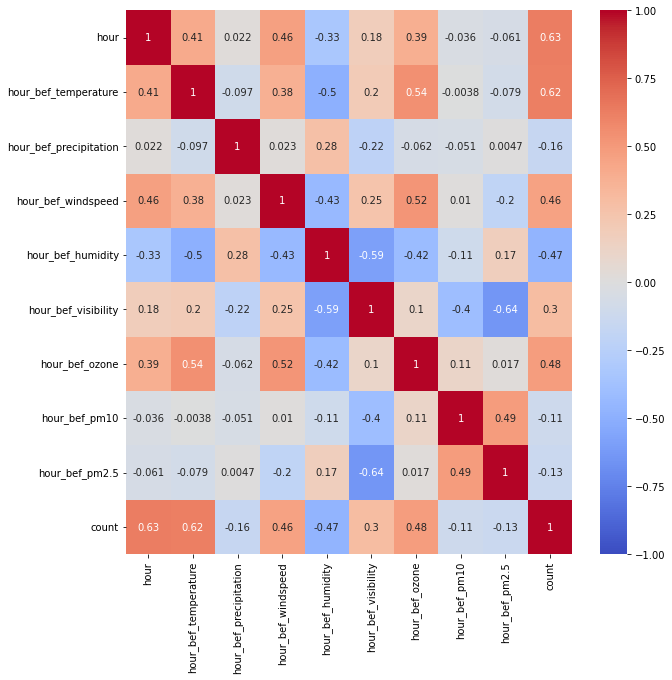

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(data=train.corr(),cmap='coolwarm',annot=True,vmax=1,vmin=-1)

- 시간,온도,오존,풍속 증가할수록 count 증가
- 미세먼지 영향이 적다.
- 강수여부 (0,1) binary 판단이 어렵다.

아이디어
- 불쾌지수 변수 만들어질까?
- temper
- pm 이나 visibility 같은 변수가?
- 시간에 따른 변수를 만들 수 있을까?

# hour & count

<AxesSubplot:xlabel='count', ylabel='Count'>

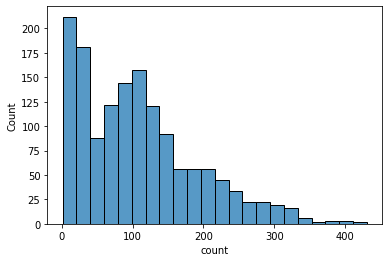

In [9]:
sns.histplot(x=train['count'])

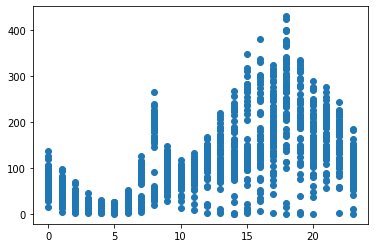

In [10]:
plt.scatter(train['hour'],train['count'])

<AxesSubplot:xlabel='hour'>

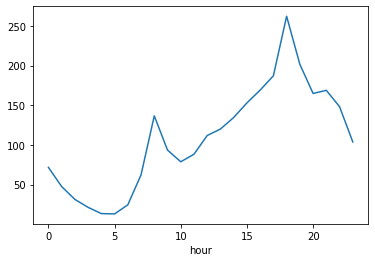

In [11]:
train.groupby(['hour'])['count'].mean().plot()

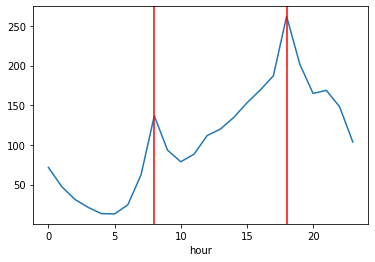

In [12]:
train.groupby(['hour'])['count'].mean().plot()
plt.axvline(x=8,color='r')
plt.axvline(x=18,color='r')



- 출퇴근 시간 변수를 만들어 줄 수 있을까? dummy 변수를 주자.
- 시간이 증가하면, 자전거 대여수는 증가한다고 할 수 있다.

# 나머지 변수들

- 기온
- 풍속
- 습도
- visibility
- pm10
- pm2.5

# 강수 여부

In [13]:
train_rain = train[ train['hour_bef_precipitation'] ==1 ]
train_no_rain = train[ train['hour_bef_precipitation'] ==0 ]

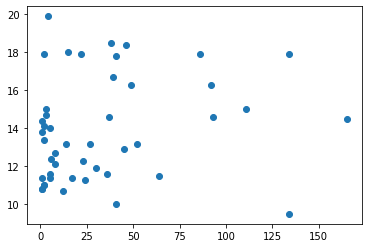

In [14]:

plt.scatter(train_rain['count'],train_rain['hour_bef_temperature'])



In [17]:
train.shape

(1459, 10)

In [16]:
train_rain.shape

(46, 10)

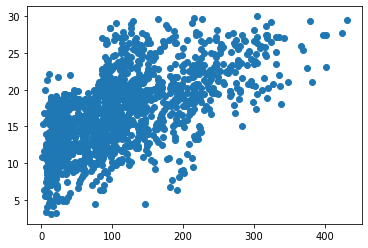

In [18]:
plt.scatter(train_no_rain['count'],train_no_rain['hour_bef_temperature'])
# 1시간 전 강우여부는 제거해도 좋다!

# 기온

<AxesSubplot:xlabel='hour_bef_temperature', ylabel='Count'>

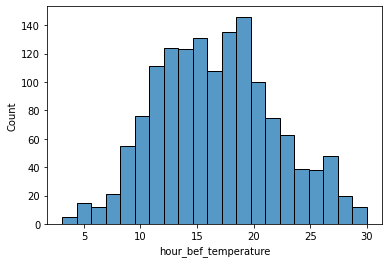

In [19]:
sns.histplot(x=train['hour_bef_temperature'])

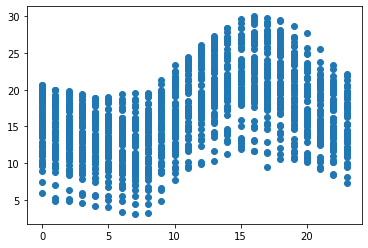

In [20]:
plt.scatter(train['hour'],train['hour_bef_temperature'])

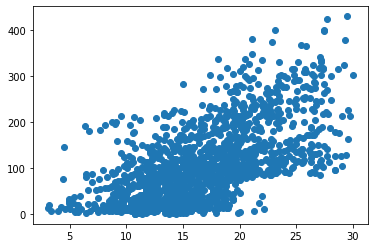

In [21]:
plt.scatter(train['hour_bef_temperature'],train['count'])

# 풍속

D:\minicondas\keras\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='hour_bef_windspeed', ylabel='Count'>

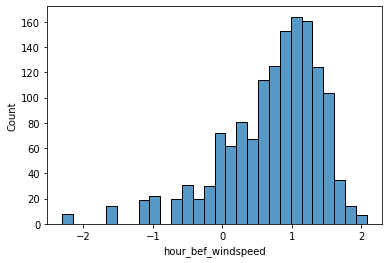

In [26]:
sns.histplot(x=np.log(train['hour_bef_windspeed']))

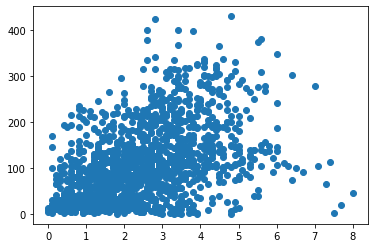

In [27]:
plt.scatter(train['hour_bef_windspeed'],train['count'])

# 습도

<AxesSubplot:xlabel='hour_bef_humidity', ylabel='Count'>

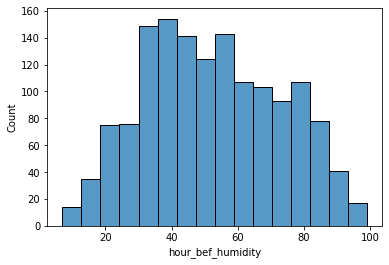

In [30]:
sns.histplot(x=train['hour_bef_humidity'] )

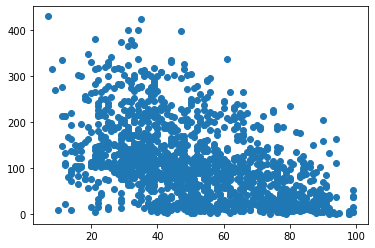

In [31]:
plt.scatter(train['hour_bef_humidity'],train['count'])

In [32]:
train['bad'] = (train['hour_bef_humidity']+train['hour_bef_temperature'])/ train['hour_bef_windspeed']

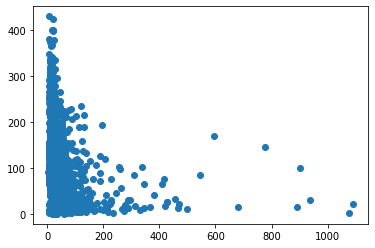

In [33]:
plt.scatter(train['bad'] ,train['count'])

# pm

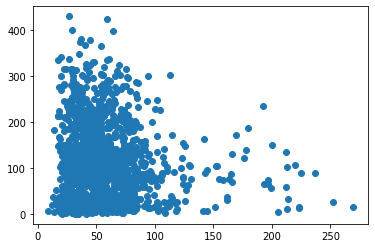

In [34]:
plt.scatter(train['hour_bef_pm10'],train['count'])

# visibility

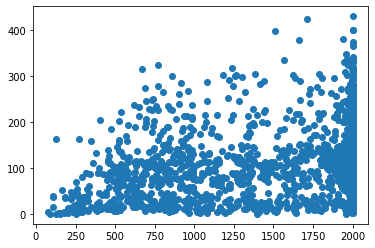

In [35]:
plt.scatter(train['hour_bef_visibility'],train['count'])

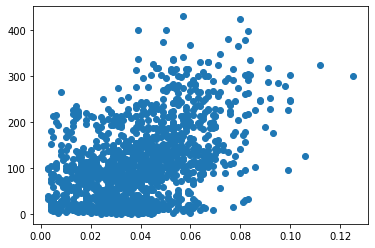

In [37]:

plt.scatter(train['hour_bef_ozone'],train['count'])

# 아이디어

- visibility  x
- pm x
- feature engineering 모르겠다.
- 강수여부 x


In [36]:
!pip install shap